### Face Detection

In [1]:
!pip install opencv-python

In [2]:
import cv2
import sys
import numpy as np
import glob
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

## Read Data

In [3]:
img_path = 'face'

images = glob.glob(img_path+'/*')

img_dict={}
dim = (275, 350)
for img_p in images:    
    k = img_p[img_p.find('database/',)+6:-4]
    gif = cv2.VideoCapture(img_p)
    ret, frame = gif.read()
    img = Image.fromarray(frame)
    img = np.array(img.convert('RGB'))
    img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
    img_dict[k] = [img, k[0]]    # img_dict = {"m044": [image_array, 'm'], ...}

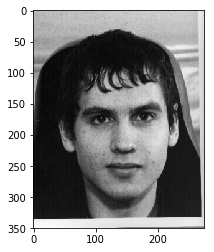

In [4]:
imshow(img_dict['m044'][0])

## Image Flattening

In [5]:
def flatten_rgb_as_column(picture):
    picture_rgb = []
    for row in picture: # iterate row
        for pixel in row: # iterate 400 pixels to make column
            for rgb in pixel: # iterate 3 rgb colors
                picture_rgb.append(rgb)
    return picture_rgb

In [6]:

flattened_rgb = []
label = []

for k in img_dict.keys():
    label.append(img_dict[k][1])
    flattened_rgb.append(flatten_rgb_as_column(img_dict[k][0]))

In [7]:
data = np.array([np.array(xi) for xi in flattened_rgb])
y = np.array(label)

In [8]:
data.shape

(100L, 288750L)

In [9]:
y

array(['m', 'm', 'm', 'm', 'm', 'm', 'f', 'f', 'f', 'f', 'f', 'f', 'm',
       'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'f', 'f',
       'f', 'f', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'f', 'f',
       'f', 'm', 'm', 'f', 'f', 'f', 'f', 'f', 'f', 'm', 'f', 'f', 'f',
       'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'm', 'm', 'm', 'm', 'm',
       'm', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'm', 'm', 'm', 'm',
       'm', 'f', 'f', 'f', 'f', 'f', 'm', 'm', 'm', 'm', 'm', 'm', 'm',
       'm', 'm', 'f', 'f', 'f', 'f', 'f', 'm', 'm'], dtype='|S1')

## Principal Components Analysis

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=10)
X = pca.fit_transform(data)

In [12]:
print pca.explained_variance_ratio_.sum()

0.5878016001014428


In [13]:
pca.explained_variance_ratio_*100

array([11.25731162, 10.49699853,  7.31984518,  6.41859927,  6.05004342,
        4.77452092,  3.72998972,  3.59704068,  2.65576363,  2.48004704])

In [14]:
dim_x, dim_y = (275, 350)
def normit(a):
    a=(a - a.min())/(a.max() -a.min())
    a=a*256
    return np.round(a)
def getNC(pc, j):
    size=dim_x*dim_y*3
    r=pc.components_[j][0:size:3]
    g=pc.components_[j][1:size:3]
    b=pc.components_[j][2:size:3]
    r=normit(r)
    g=normit(g)
    b=normit(b)
    return r,g,b
def display_component(pc, j):
    r,g,b = getNC(pc,j)
    rgbArray = np.zeros((dim_x, dim_y,3), 'uint8')
    rgbArray[..., 0] = r.reshape(dim_x, dim_y)
    rgbArray[..., 1] = g.reshape(dim_x, dim_y)
    rgbArray[..., 2] = b.reshape(dim_x, dim_y)
    imshow(rgbArray)

In [15]:
STANDARD_SIZE = (dim_x, dim_y)#standardized pixels in image.

In [16]:
def get_image(mat):
    size = STANDARD_SIZE[0]*STANDARD_SIZE[1]*3
    r,g,b = mat[0:size:3], mat[1:size:3],mat[2:size:3]
#     print r, g, b
    rgbArray = np.zeros((STANDARD_SIZE[1],STANDARD_SIZE[0], 3), 'uint8')#3 channels
    rgbArray[..., 0] = r.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
    rgbArray[..., 1] = b.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
    rgbArray[..., 2] = g.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
#     print rgbArray
    return rgbArray

def display_image(mat):
    imshow(get_image(mat))

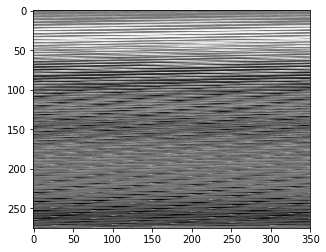

In [17]:

display_component(pca,0)

In [18]:

import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

In [19]:
df = pd.DataFrame({"y":y=='m', "label":np.where(y=='m', "male", "female")})
for i in range(pca.explained_variance_ratio_.shape[0]):
    df["pc%i" % (i+1)] = X[:,i]
df.head()

,label,y,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,male,True,-4133.804397,11830.285561,-5088.504738,20317.735380,6642.744980,-756.777067,-19419.180168,7259.723804,5006.507333,-9189.758205
1,male,True,2106.088298,-2848.347058,12838.176446,1180.681352,1795.363066,8941.518020,-1493.962665,-2927.828723,-2924.045853,-981.725300
2,male,True,-9026.893487,-5395.461326,3901.287491,916.088360,-10945.202112,-3418.100533,468.799242,-1655.341740,-8823.766258,666.676339
3,male,True,-7204.970501,970.804849,5112.406873,10414.430270,5044.249573,2465.438876,-8043.207961,6026.336115,10680.536865,-548.470882
4,male,True,11008.352076,5499.066504,-11742.445712,16804.248754,7404.992556,-4557.705872,-4344.490287,188.297023,374.621413,-1852.194496


In [20]:
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(xrange(df.shape[0]), train_size=0.7)

C:\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
mask=np.ones(df.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split

In [23]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, alpha=0.1, psize=10, zfunc=False, predicted=False):
    h = .02
    X=np.concatenate((Xtr, Xte))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    #plt.figure(figsize=(10,6))
    if zfunc:
        p0 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
        p1 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z=zfunc(p0, p1)
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    ZZ = Z.reshape(xx.shape)
    if mesh:
        plt.pcolormesh(xx, yy, ZZ, cmap=cmap_light, alpha=alpha, axes=ax)
    if predicted:
        showtr = clf.predict(Xtr)
        showte = clf.predict(Xte)
    else:
        showtr = ytr
        showte = yte
    ax.scatter(Xtr[:, 0], Xtr[:, 1], c=showtr-1, cmap=cmap_bold, s=psize, alpha=alpha,edgecolor="k")
    # and testing points
    ax.scatter(Xte[:, 0], Xte[:, 1], c=showte-1, cmap=cmap_bold, alpha=alpha, marker="s", s=psize+10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    return ax,xx,yy

In [24]:
from sklearn.grid_search import GridSearchCV

C:\Anaconda2\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [25]:
def cv_optimize(clf, parameters, x, y, n_folds, score_func):
    fitmodel = GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    fitmodel.fit(x, y)
    return fitmodel.best_estimator_

In [26]:
from sklearn.metrics import confusion_matrix
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask is not None:
        print "using mask"
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split is not None:
        print "using reuse split"
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print "############# based on standard predict ################"
    print "Accuracy on training data: %0.2f" % (training_accuracy)
    print "Accuracy on test data:     %0.2f" % (test_accuracy)
    print confusion_matrix(ytest, clf.predict(Xtest))
    print "########################################################"
    return clf, Xtrain, ytrain, Xtest, ytest

## KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
pc_name = [i for i in df.columns[2:4]]

In [29]:
clf_knn, Xtrain_k, ytrain_k, Xtest_k, ytest_k = do_classify(KNeighborsClassifier(), 
                                                            {"n_neighbors": range(1,40,2)}, 
                                                            df,pc_name, 'label', 'male', mask=mask)

using mask
############# based on standard predict ################
Accuracy on training data: 0.83
Accuracy on test data:     0.83
[[12  2]
 [ 3 13]]
########################################################


In [30]:
pc_name = [i for i in df.columns[2:10]]

In [31]:
clf_knn_8, Xtrain_k_8, ytrain_k_8, Xtest_k_8, ytest_k_8 = do_classify(KNeighborsClassifier(), 
                                                                      {"n_neighbors": range(1,40,2)}, 
                                                                      df,pc_name, 'label', 'male', mask=mask)

using mask
############# based on standard predict ################
Accuracy on training data: 0.86
Accuracy on test data:     0.93
[[13  1]
 [ 1 15]]
########################################################


## SVM

In [32]:
from sklearn.svm import LinearSVC
clfsvm_8, Xtrain_svm_8, ytrain_svm_8, Xtest_svm_8, ytest_svm_8 = do_classify(LinearSVC(loss="hinge"), 
                                                                   {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},  
                                                                   df,pc_name, 'label', 'male', mask=mask)

using mask
############# based on standard predict ################
Accuracy on training data: 0.89
Accuracy on test data:     0.83
[[12  2]
 [ 3 13]]
########################################################


## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
clf_l_8, Xtrain_l_8, ytrain_l_8, Xtest_l_8, ytest_l_8  = do_classify(LogisticRegression(),
                                                                     {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},
                                                                     df,pc_name, 'label', 'male', mask=mask)

using mask
############# based on standard predict ################
Accuracy on training data: 0.91
Accuracy on test data:     0.90
[[13  1]
 [ 2 14]]
########################################################


## ROC Curve

In [34]:
import seaborn as sns
from sklearn.metrics import roc_curve, auc
def make_roc(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:#for stuff like logistic regression
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:#for stuff like SVM
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    roc_auc = auc(fpr, tpr)
    if skip:
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
    if labe!=None:
        for k in xrange(0, fpr.shape[0],labe):
            #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
            threshold = str(np.round(thresholds[k], 2))
            ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax

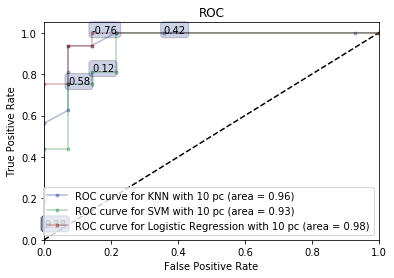

In [35]:
with sns.color_palette("dark"):
    ax=make_roc("KNN with 10 pc",clf_knn_8, ytest_k_8, Xtest_k_8)
    ax=make_roc("SVM with 10 pc", clfsvm_8, ytest_svm_8, Xtest_svm_8, ax, proba=False)
    make_roc("Logistic Regression with 10 pc", clf_l_8, ytest_l_8, Xtest_l_8, ax, proba=False)

### Application

In [36]:
#read the image
application_imagePath = 'trump.jpg'

# Create the haar cascade
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Read in the image
application_image = cv2.imread(application_imagePath)
gray = cv2.cvtColor(application_image, cv2.COLOR_BGR2GRAY)

In [37]:
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    flags = cv2.CASCADE_SCALE_IMAGE
)

print "Found {0} faces!".format(len(faces))

Found 6 faces!


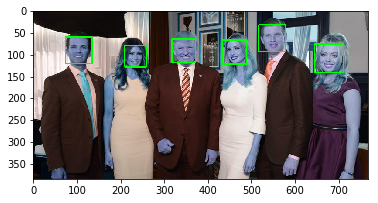

In [38]:
for (x, y, w, h) in faces:
    cv2.rectangle(application_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

imshow(application_image)

In [39]:
application_face_image = []
for i in range(len(faces)):
    application_face_image.append(application_image[faces[i][1]:faces[i][1]+faces[i][3], faces[i][0]:faces[i][0]+faces[i][2]])

0th face!


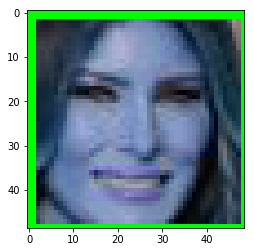

In [40]:
print "{0}th face!".format(0)
imshow(application_face_image[0])

1th face!


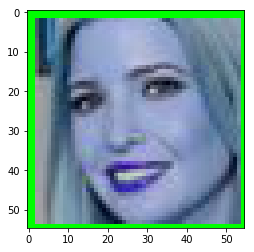

In [41]:
print "{0}th face!".format(1)
imshow(application_face_image[1])

2th face!


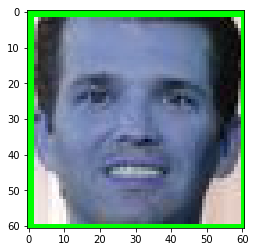

In [42]:
print "{0}th face!".format(2)
imshow(application_face_image[2])

3th face!


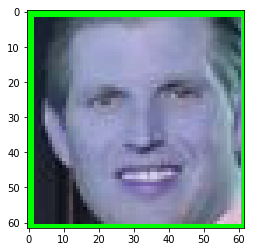

In [43]:
print "{0}th face!".format(3)
imshow(application_face_image[3])

4th face!


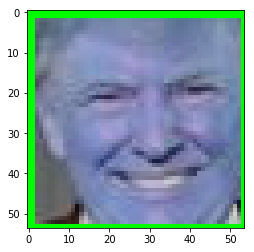

In [44]:
print "{0}th face!".format(4)
imshow(application_face_image[4])

5th face!


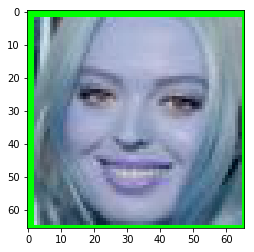

In [45]:
print "{0}th face!".format(5)
imshow(application_face_image[5])

In [46]:
for i in range(len(application_face_image)):    
    img = cv2.resize(application_face_image[i], dim, interpolation=cv2.INTER_AREA)
    application_face_image[i] = img

In [47]:
flattened_application_faces = []
for face in application_face_image:
    flattened_application_faces.append(flatten_rgb_as_column(face))
    
application_data = np.array([np.array(xi) for xi in flattened_application_faces])

In [48]:
len(application_data[0])

288750

In [49]:
pca_applied_application_X = pca.transform(application_data)
application_df = pd.DataFrame({})
for i in range(10):
    application_df["pc%i" % (i+1)] = pca_applied_application_X[:,i]

In [55]:
pc_name = [i for i in df.columns[2:10]]
X_application = application_df[pc_name]
application_y_pred = clf_l_8.predict(X_application)

In [58]:
application_y_pred

[0, 1, 1, 1, 1, 1]

## Result: 67% Accuracy